In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
df = pd.read_csv("C:\\Users\\Krishnendu\\Downloads\\titanic.csv")

In [3]:
# Display basic info
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

KeyError: 'Embarked'

In [9]:
# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [10]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass  Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  0.0  891.000000  891.000000   
mean    446.000000    0.383838    2.308642  NaN   29.361582    0.523008   
std     257.353842    0.486592    0.836071  NaN   13.019697    1.102743   
min       1.000000    0.000000    1.000000  NaN    0.420000    0.000000   
25%     223.500000    0.000000    2.000000  NaN   22.000000    0.000000   
50%     446.000000    0.000000    3.000000  NaN   28.000000    0.000000   
75%     668.500000    1.000000    3.000000  NaN   35.000000    1.000000   
max     891.000000    1.000000    3.000000  NaN   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


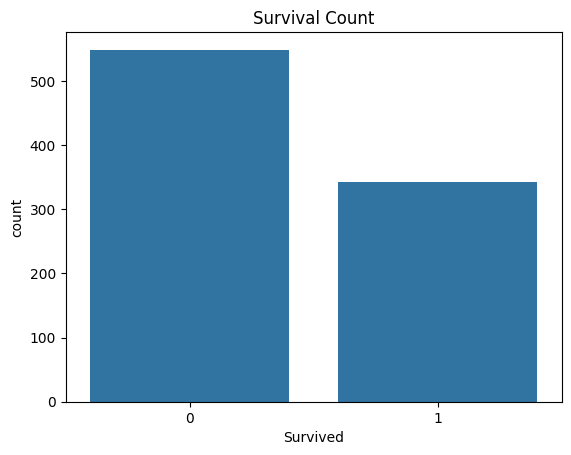

In [11]:
# EDA - Visualization

# 1. Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

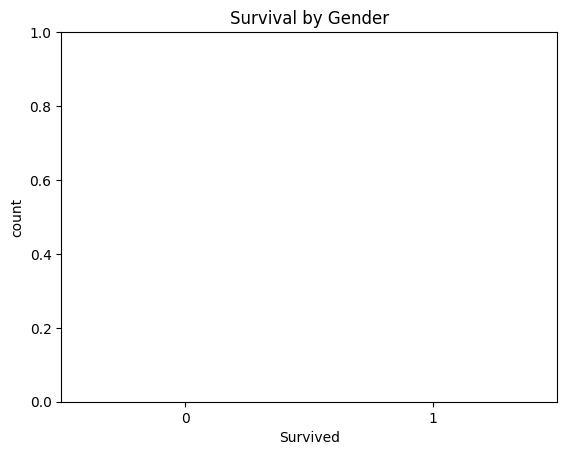

In [19]:
# 2. Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

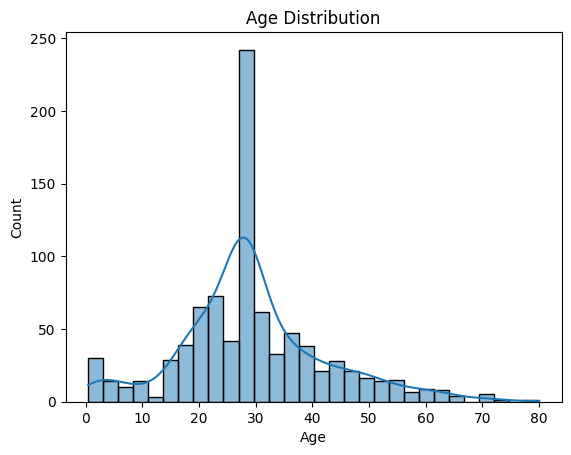

In [13]:
# 3. Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

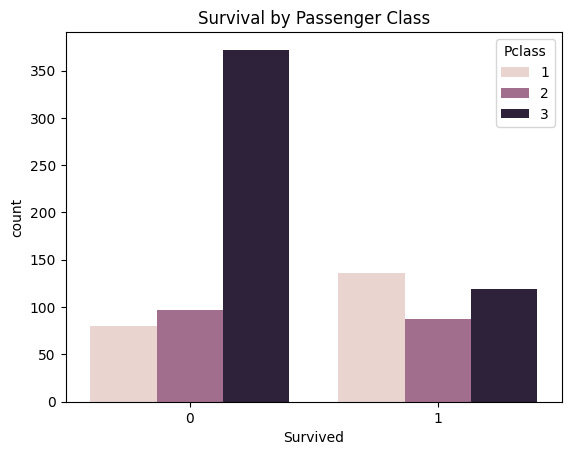

In [14]:
# 4. Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

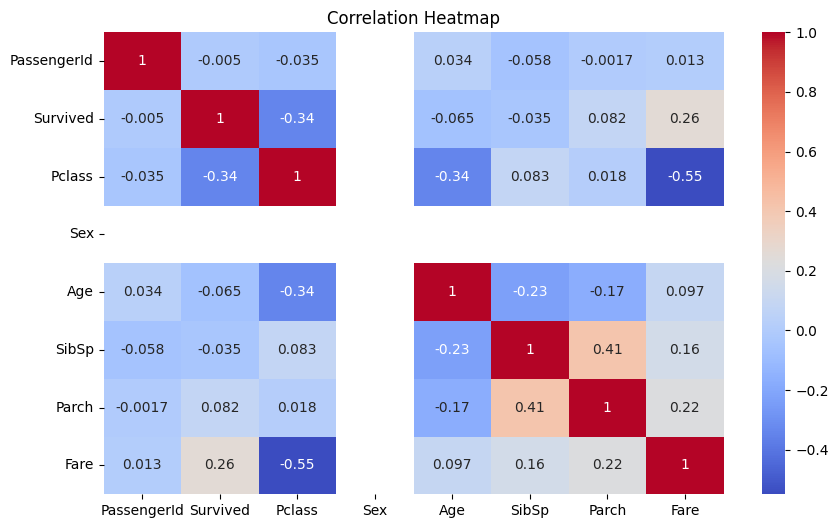

In [15]:
# 5. Correlation heatmap
plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()
numeric_df = df.select_dtypes(include=[np.number])  # only keep numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()